In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
sns.set_theme(style="whitegrid")

In [48]:
video_games_df = pd.read_csv('Video Games Sales.csv')

video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [49]:
video_games_df.head(3)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07


In [6]:
video_games_df.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [7]:
# Data Cleaning

# Handling missing values
video_games_df['Year'].fillna(video_games_df['Year'].mode()[0], inplace=True)
video_games_df['Publisher'].fillna('Unknown', inplace=True)

# Convert Year column to integer
video_games_df['Year'] = video_games_df['Year'].astype(int)

# Checking changes in data
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1907 non-null   int32  
 5   Genre          1907 non-null   object 
 6   Publisher      1907 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(6), int32(1), int64(2), object(4)
memory usage: 186.4+ KB


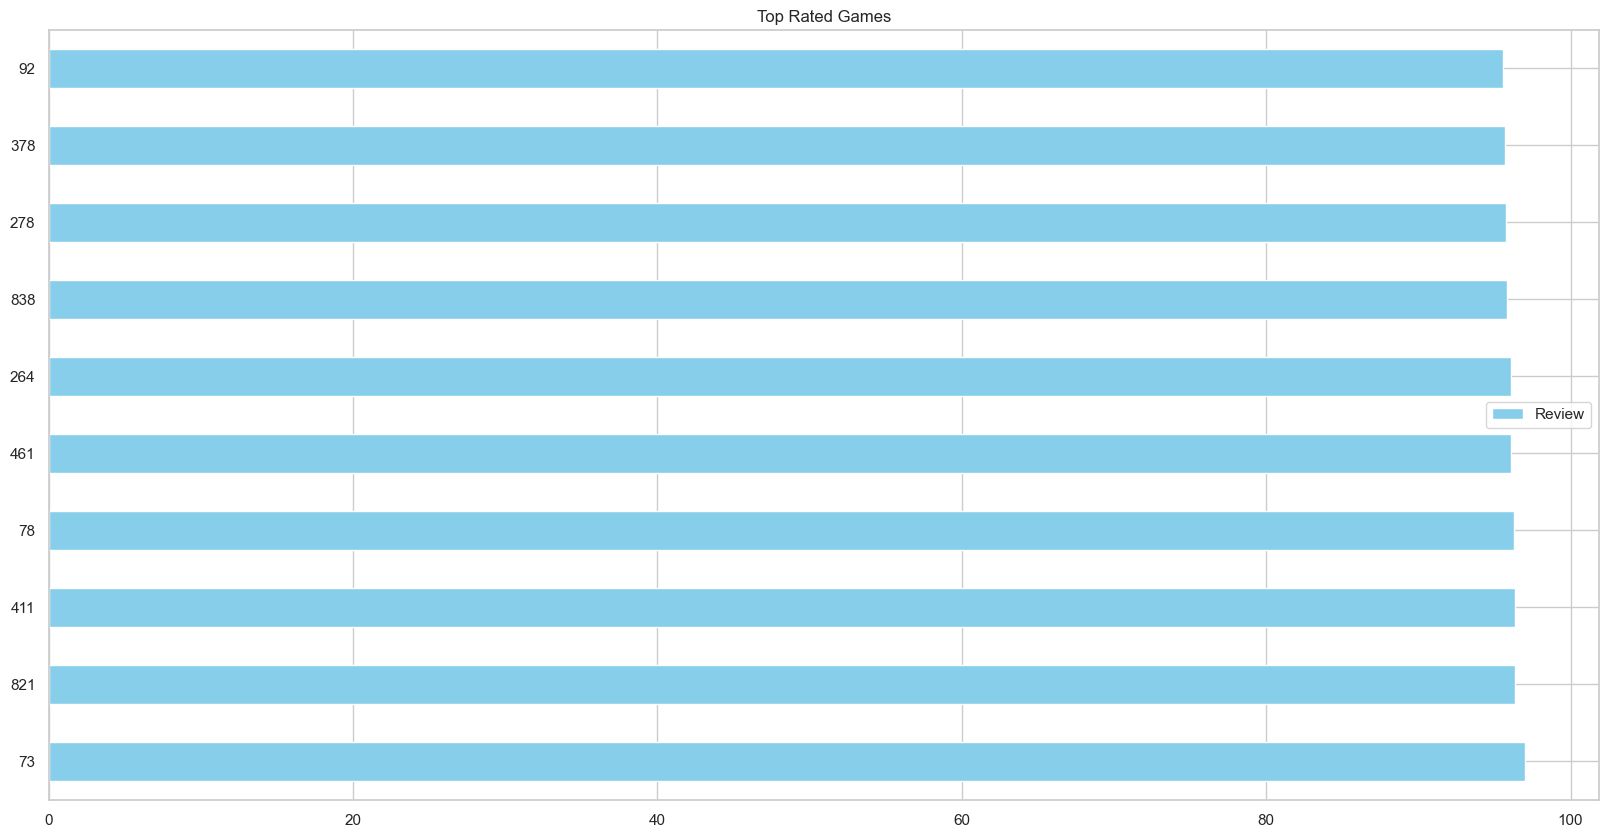

In [59]:
# Top rated games overall
top_rated_games = video_games_df.sort_values(by='Review', ascending=False)[['Game Title', 'Genre', 'Review']].head(10)

# Average review scores by genre
average_reviews_by_genre = video_games_df.groupby('Genre')['Review'].mean().sort_values(ascending=False)

# Top-rated game in each genre
top_rated_by_genre = video_games_df.loc[video_games_df.groupby('Genre')['Review'].idxmax()][['Genre', 'Game Title', 'Review']]

# top_rated_games, average_reviews_by_genre, top_rated_by_genre
# top_publishers_by_sales.plot(kind='barh', color='skyblue', ax=axes[0, 0], title='Top Publishers by Global Sales')

top_rated_games.plot(kind='barh', color='skyblue', title='Top Rated Games', figsize=(20,10))
plt.show()

In [9]:
# Top publishers by global sales
top_publishers_by_sales = video_games_df.groupby('Publisher')['Global'].sum().sort_values(ascending=False).head(10)

# Top publishers by average review scores
top_publishers_by_reviews = video_games_df.groupby('Publisher')['Review'].mean().sort_values(ascending=False).head(10)

# Combine sales and reviews for a comprehensive view
publishers_combined = video_games_df.groupby('Publisher').agg(
    Total_Global_Sales=('Global', 'sum'),
    Average_Review=('Review', 'mean'),
    Number_of_Games=('Game Title', 'count')
).sort_values(by=['Total_Global_Sales', 'Average_Review'], ascending=[False, False])

top_publishers_by_sales, top_publishers_by_reviews, publishers_combined.head(10)


(Publisher
 Nintendo                       1448.84
 Electronic Arts                 633.36
 Sony Computer Entertainment     377.61
 Activision                      371.42
 Take-Two Interactive            208.42
 Ubisoft                         196.32
 Microsoft Game Studios          169.73
 THQ                             142.98
 Sega                            122.67
 Capcom                          114.33
 Name: Global, dtype: float64,
 Publisher
 Banpresto            94.000000
 Valve Software       93.240000
 Valve                91.000000
 NCSoft               90.020000
 Havas Interactive    88.580000
 Square EA            87.640000
 GameBank             87.000000
 MTV Games            86.168571
 RedOctane            85.653333
 Square               85.400000
 Name: Review, dtype: float64,
                              Total_Global_Sales  Average_Review  \
 Publisher                                                         
 Nintendo                                1448.84       81.62

In [10]:
# Correcting the aggregation to include Global sales explicitly
sales_by_region_genre = video_games_df.groupby('Genre').agg({
    'North America': 'sum',
    'Europe': 'sum',
    'Japan': 'sum',
    'Rest of World': 'sum'
})
sales_by_region_genre['Global'] = sales_by_region_genre.sum(axis=1)

sales_by_region_platform = video_games_df.groupby('Platform').agg({
    'North America': 'sum',
    'Europe': 'sum',
    'Japan': 'sum',
    'Rest of World': 'sum'
})
sales_by_region_platform['Global'] = sales_by_region_platform.sum(axis=1)

sales_by_region_genre.sort_values(by='Global', ascending=False), sales_by_region_platform.sort_values(by='Global', ascending=False)


(              North America  Europe   Japan  Rest of World  Global
 Genre                                                             
 Sports               354.62  221.09   56.47          71.06  703.24
 Action               320.88  205.91   45.66          64.87  637.32
 Platform             317.03  139.54  104.17          34.42  595.16
 Shooter              333.40  155.89   14.22          53.84  557.35
 Role-Playing         197.54  100.90  169.32          28.53  496.29
 Racing               214.35  151.62   43.79          42.08  451.84
 Misc                 205.46  131.48   50.78          38.35  426.07
 Fighting             133.07   63.49   34.01          18.44  249.01
 Adventure            116.83   76.88   27.01          18.80  239.52
 Simulation           101.13   64.08   24.31          15.53  205.05
 Puzzle                60.72   18.58   25.00           4.35  108.65
 Strategy              45.48   18.17   10.72           3.47   77.84,
           North America  Europe   Japan  Rest 

C:\Users\Than Aung Kyaw\AppData\Local\Temp\ipykernel_25408\2793349589.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends_by_genre = video_games_df.groupby(['Year', 'Genre']).sum()['Global'].unstack().fillna(0)
C:\Users\Than Aung Kyaw\AppData\Local\Temp\ipykernel_25408\2793349589.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends_by_platform = video_games_df.groupby(['Year', 'Platform']).sum()['Global'].unstack().fillna(0)


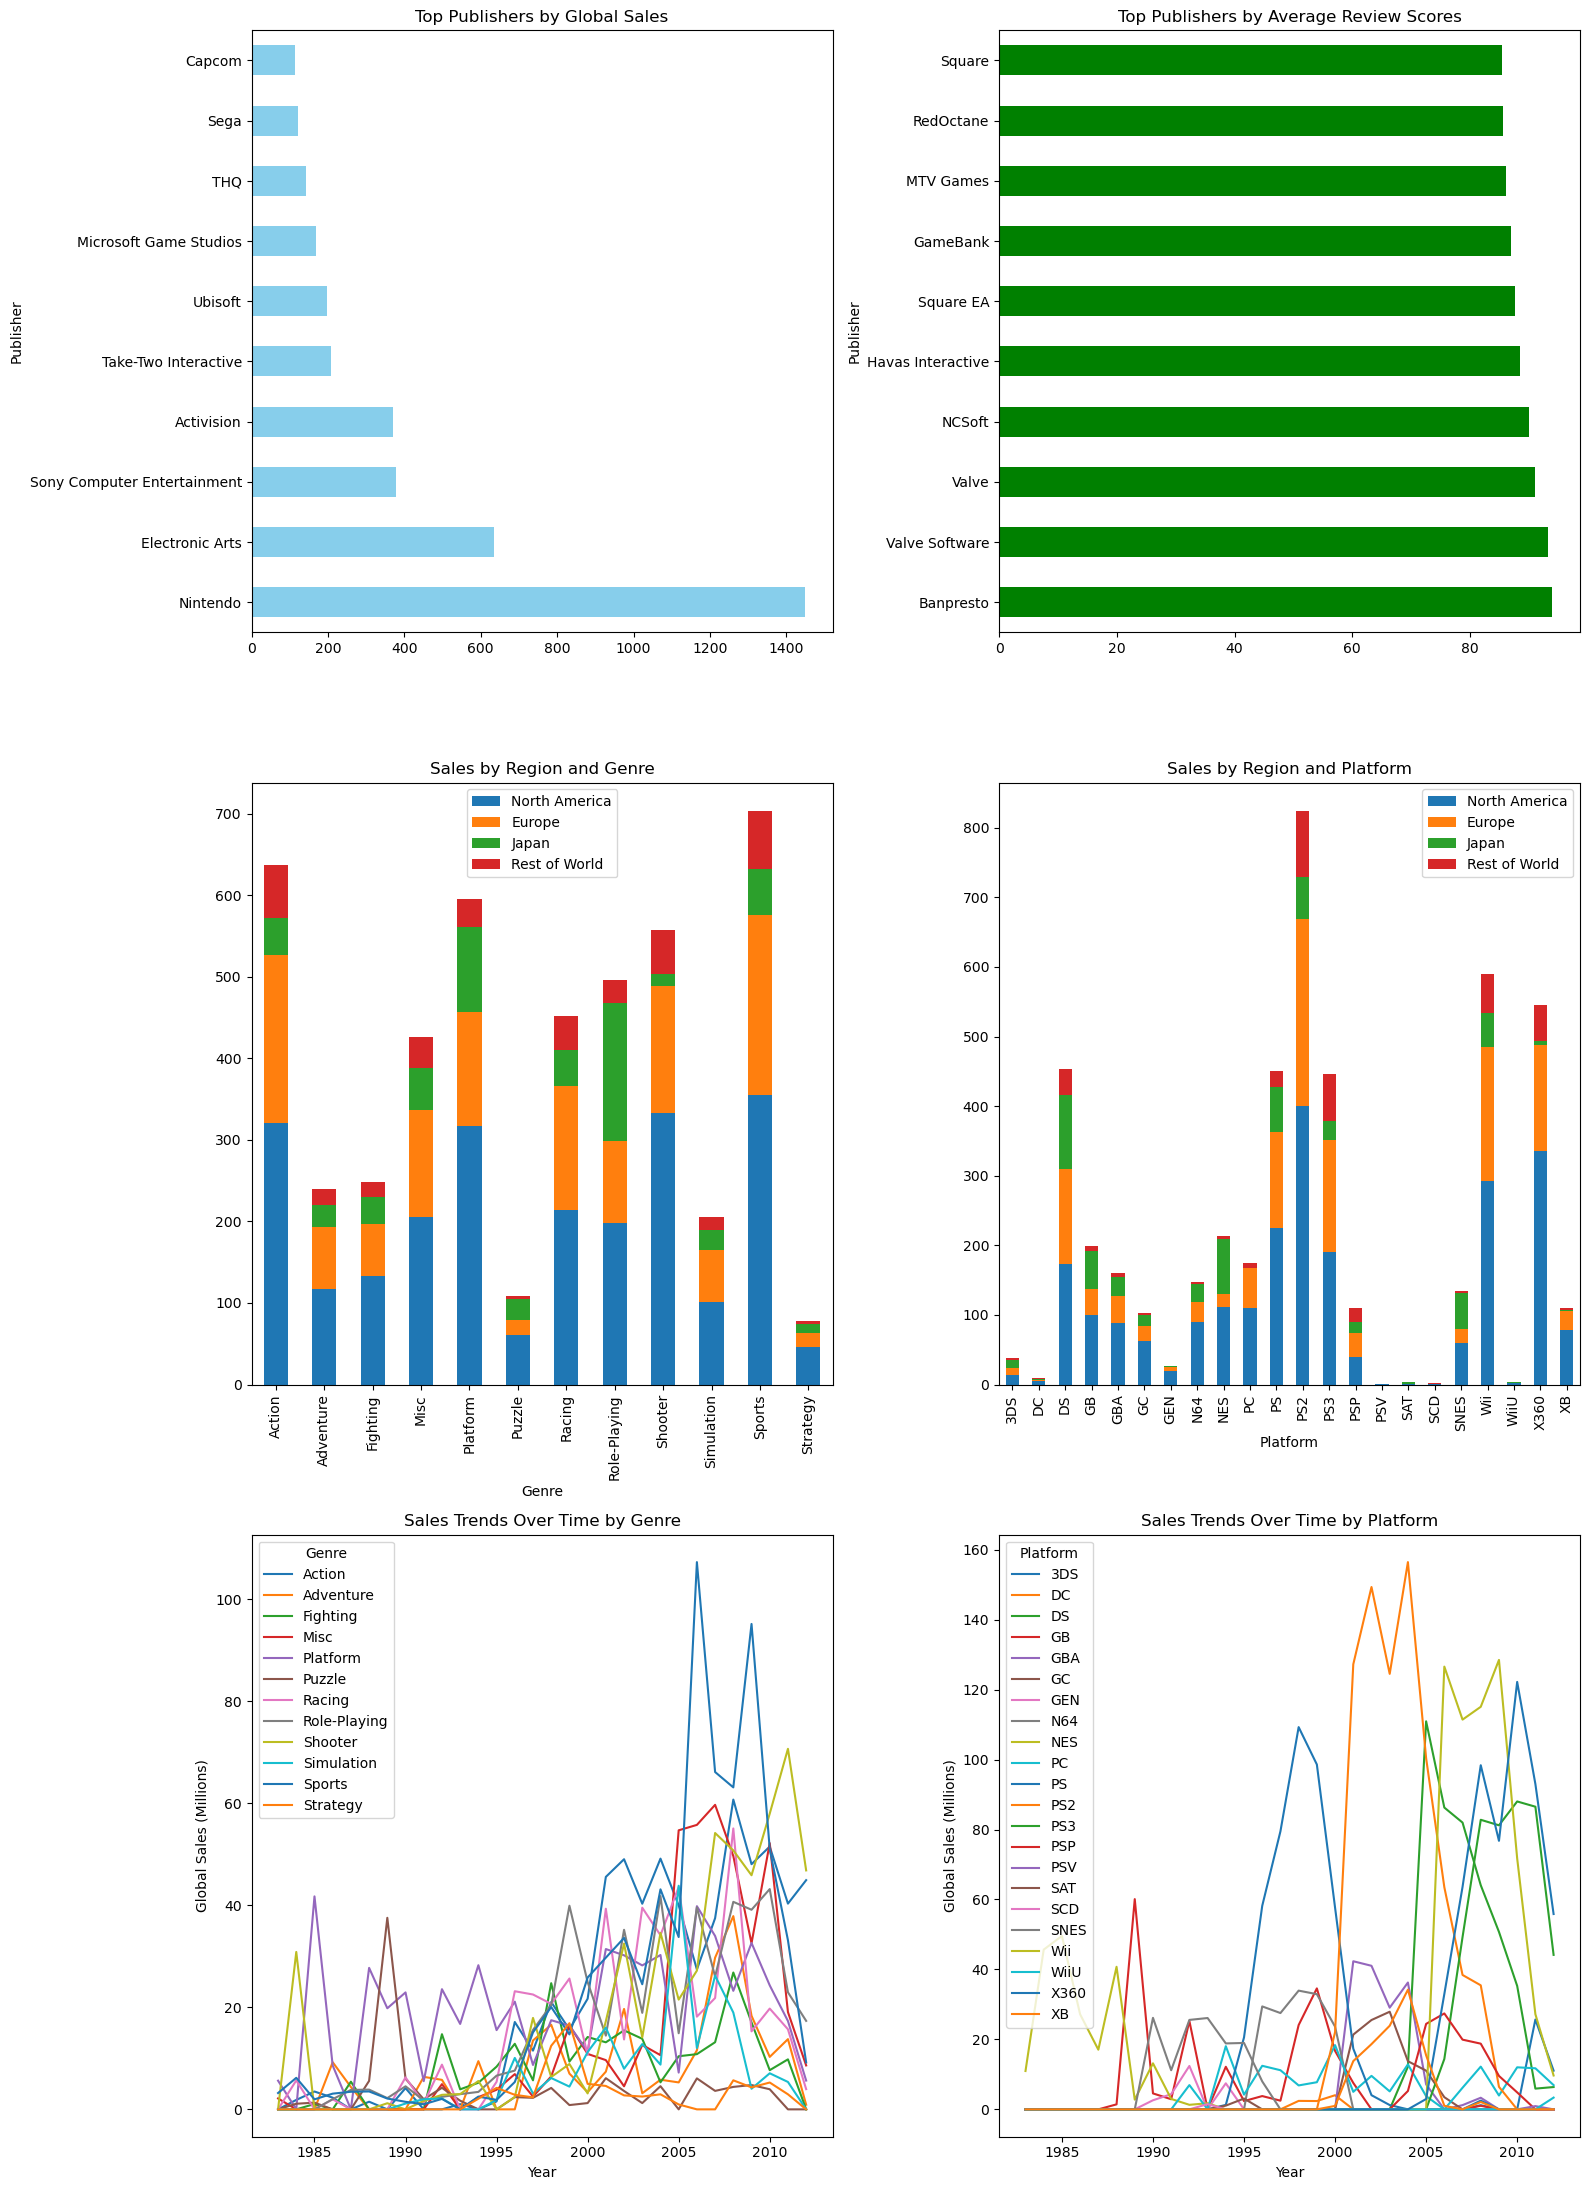

In [12]:
# Sales trends over time by genre
trends_by_genre = video_games_df.groupby(['Year', 'Genre']).sum()['Global'].unstack().fillna(0)
trends_by_platform = video_games_df.groupby(['Year', 'Platform']).sum()['Global'].unstack().fillna(0)

# Visualizing the findings

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))

# Top Publishers by Global Sales
top_publishers_by_sales.plot(kind='barh', color='skyblue', ax=axes[0, 0], title='Top Publishers by Global Sales')

# Top Publishers by Average Review Scores
top_publishers_by_reviews.plot(kind='barh', color='green', ax=axes[0, 1], title='Top Publishers by Average Review Scores')

# Sales by Region and Genre
sales_by_region_genre.drop('Global', axis=1).plot(kind='bar', stacked=True, ax=axes[1, 0], title='Sales by Region and Genre')

# Sales by Region and Platform
sales_by_region_platform.drop('Global', axis=1).plot(kind='bar', stacked=True, ax=axes[1, 1], title='Sales by Region and Platform')

# Sales Trends Over Time by Genre
trends_by_genre.plot(ax=axes[2, 0], title='Sales Trends Over Time by Genre')
axes[2, 0].set_ylabel('Global Sales (Millions)')
axes[2, 0].set_xlabel('Year')

# Sales Trends Over Time by Platform
trends_by_platform.plot(ax=axes[2, 1], title='Sales Trends Over Time by Platform')
axes[2, 1].set_ylabel('Global Sales (Millions)')
axes[2, 1].set_xlabel('Year')

# Cleanup the layout
plt.tight_layout()

plt.show()


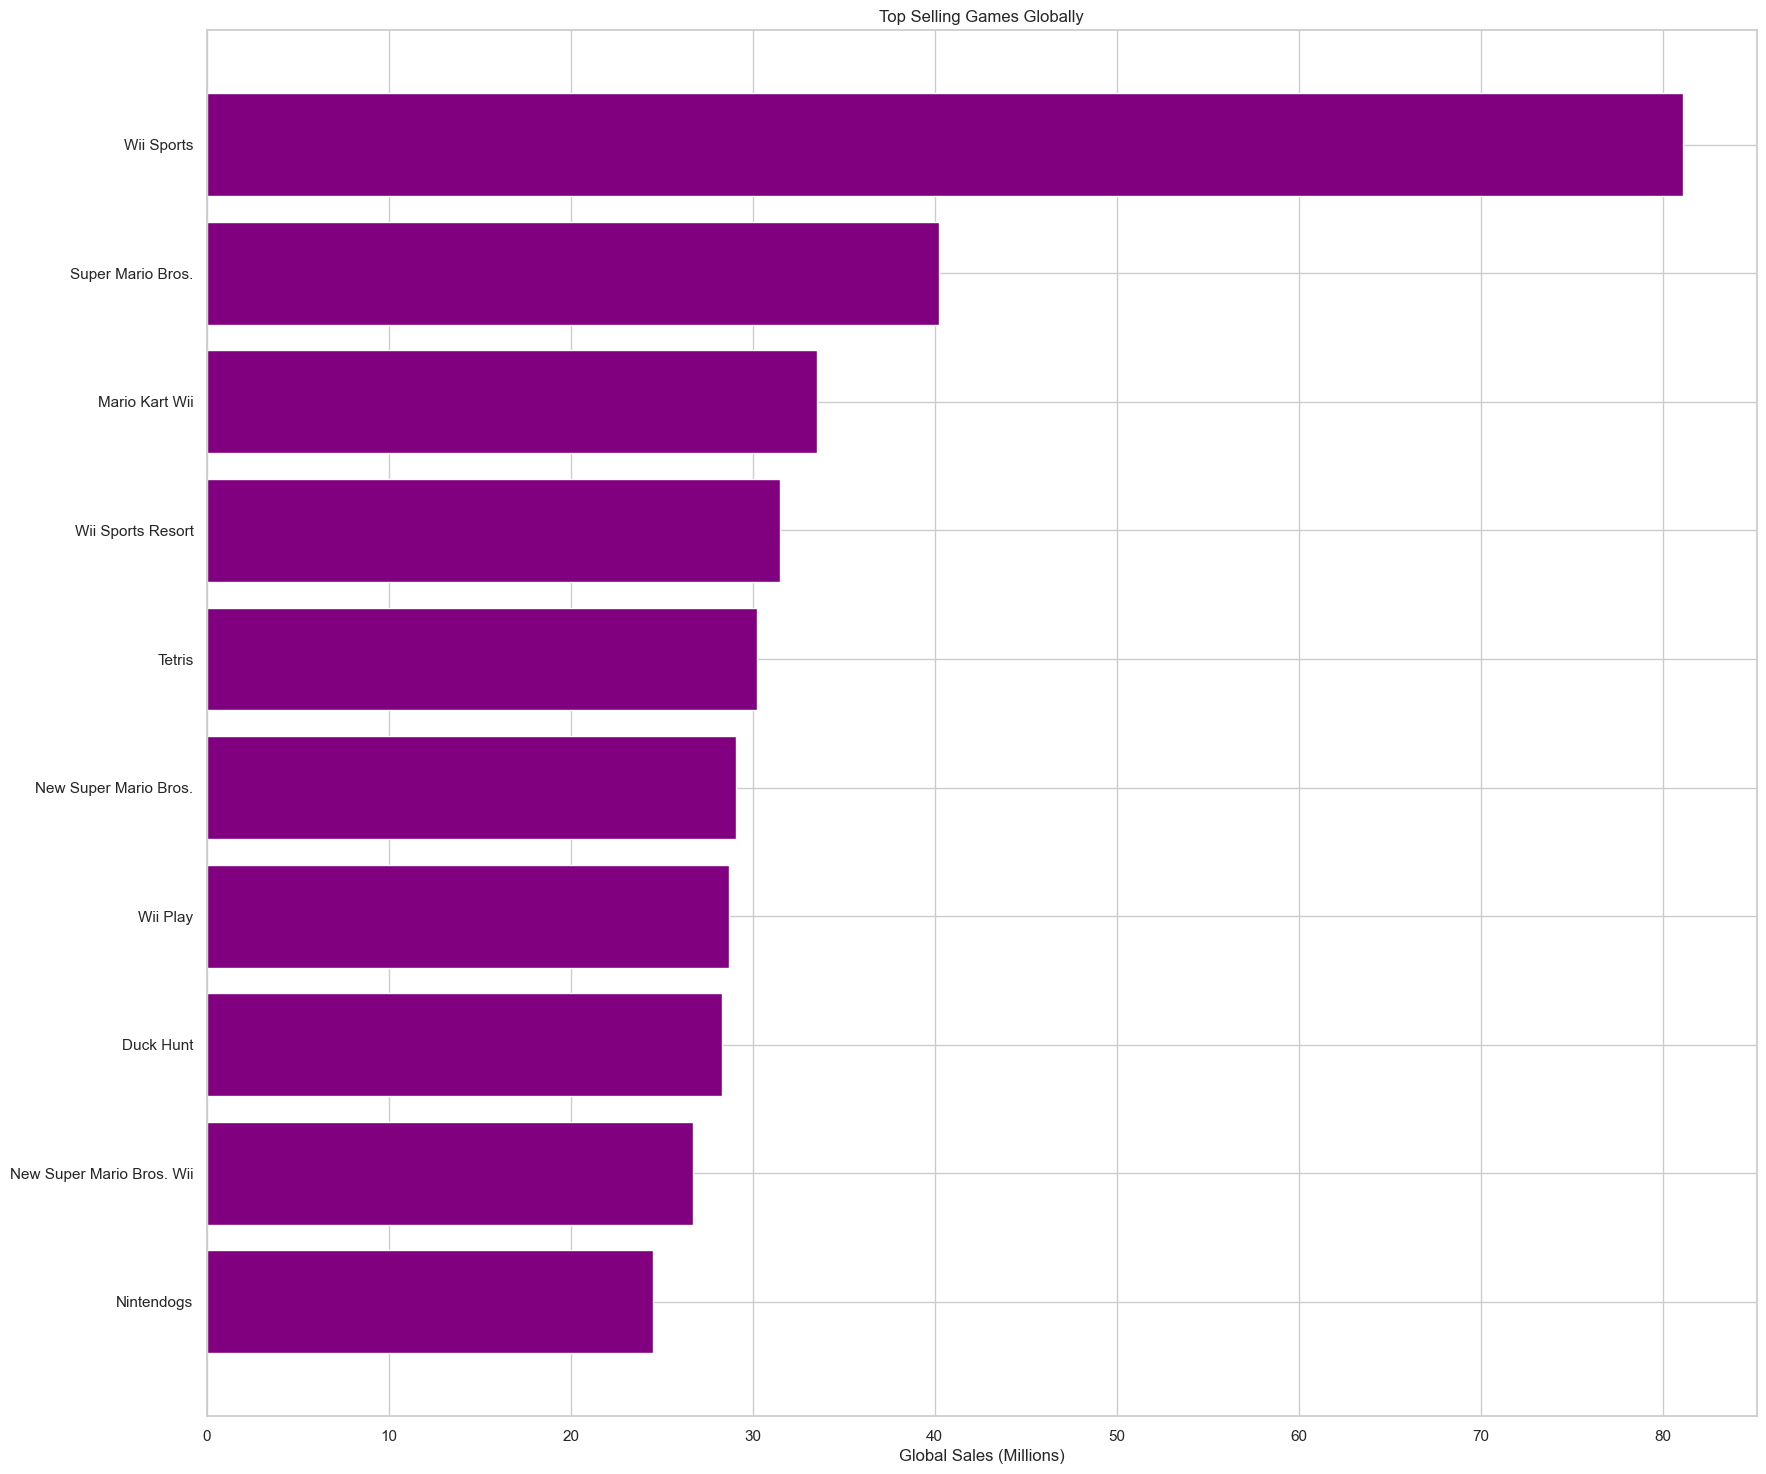

,Game Title,Global
0,Wii Sports,81.12
1,Super Mario Bros.,40.24
2,Mario Kart Wii,33.55
3,Wii Sports Resort,31.52
4,Tetris,30.26
5,New Super Mario Bros.,29.08
6,Wii Play,28.71
7,Duck Hunt,28.31
8,New Super Mario Bros. Wii,26.75
9,Nintendogs,24.50


In [26]:
# Top selling games globally
top_global_sales_games = video_games_df[['Game Title', 'Global']].sort_values(by='Global', ascending=False).head(10)

# Visualizing the top selling games globally
plt.figure(figsize=(20, 18))
plt.barh(top_global_sales_games['Game Title'], top_global_sales_games['Global'], color='purple')
plt.xlabel('Global Sales (Millions)')
plt.title('Top Selling Games Globally')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.show()

top_global_sales_games

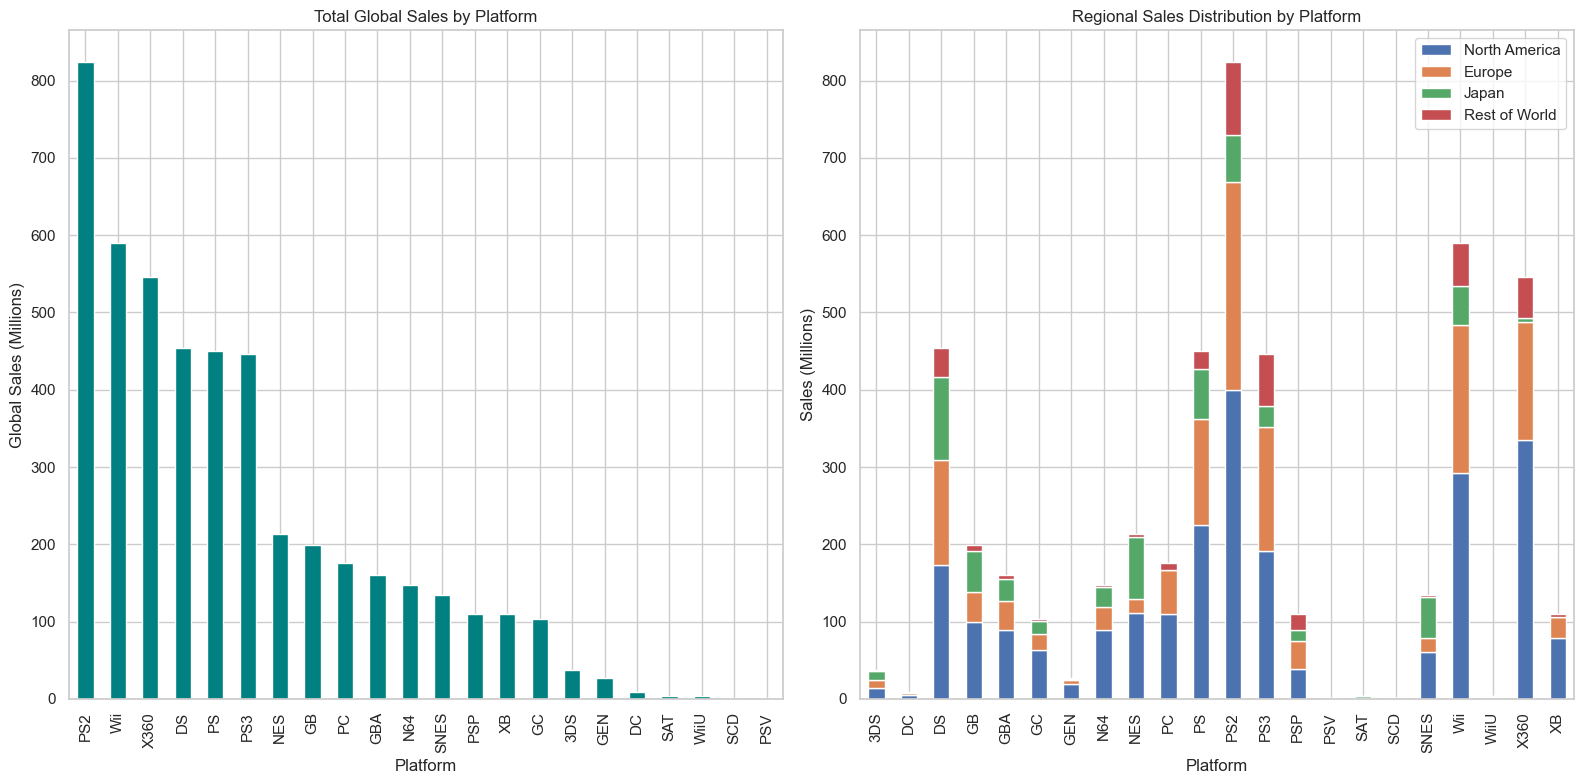

(Platform
 PS2     823.79
 Wii     590.16
 X360    545.70
 DS      453.79
 PS      450.15
 PS3     446.34
 NES     213.14
 GB      199.01
 PC      175.22
 GBA     160.37
 N64     147.47
 SNES    134.85
 PSP     110.22
 XB      110.13
 GC      103.13
 3DS      37.93
 GEN      26.79
 DC        8.84
 SAT       4.16
 WiiU      3.36
 SCD       1.50
 PSV       0.93
 Name: Global, dtype: float64,
           North America  Europe   Japan  Rest of World  Global
 Platform                                                      
 3DS               14.29    9.74   11.66           2.25   37.94
 DC                 5.43    1.69    1.43           0.27    8.82
 DS               173.37  136.25  106.48          37.63  453.73
 GB               100.09   37.75   54.14           7.03  199.01
 GBA               88.71   37.87   28.58           5.28  160.44
 GC                63.14   20.39   16.64           3.02  103.19
 GEN               19.27    5.52    1.10           0.89   26.78
 N64               89.69   28.6

In [27]:
# Total global sales by platform
total_global_sales_by_platform = video_games_df.groupby('Platform')['Global'].sum().sort_values(ascending=False)

# Correct aggregation for regional sales by platform with global total calculation
regional_sales_by_platform = video_games_df.groupby('Platform').agg({
    'North America': 'sum',
    'Europe': 'sum',
    'Japan': 'sum',
    'Rest of World': 'sum'
})
regional_sales_by_platform['Global'] = regional_sales_by_platform.sum(axis=1)

# Visualizing the findings

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Total Global Sales by Platform
total_global_sales_by_platform.plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Total Global Sales by Platform')
axes[0].set_ylabel('Global Sales (Millions)')
axes[0].set_xlabel('Platform')

# Regional Sales by Platform
regional_sales_by_platform.drop('Global', axis=1).plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Regional Sales Distribution by Platform')
axes[1].set_ylabel('Sales (Millions)')
axes[1].set_xlabel('Platform')

plt.tight_layout()
plt.show()

total_global_sales_by_platform, regional_sales_by_platform

### Trend Analysis

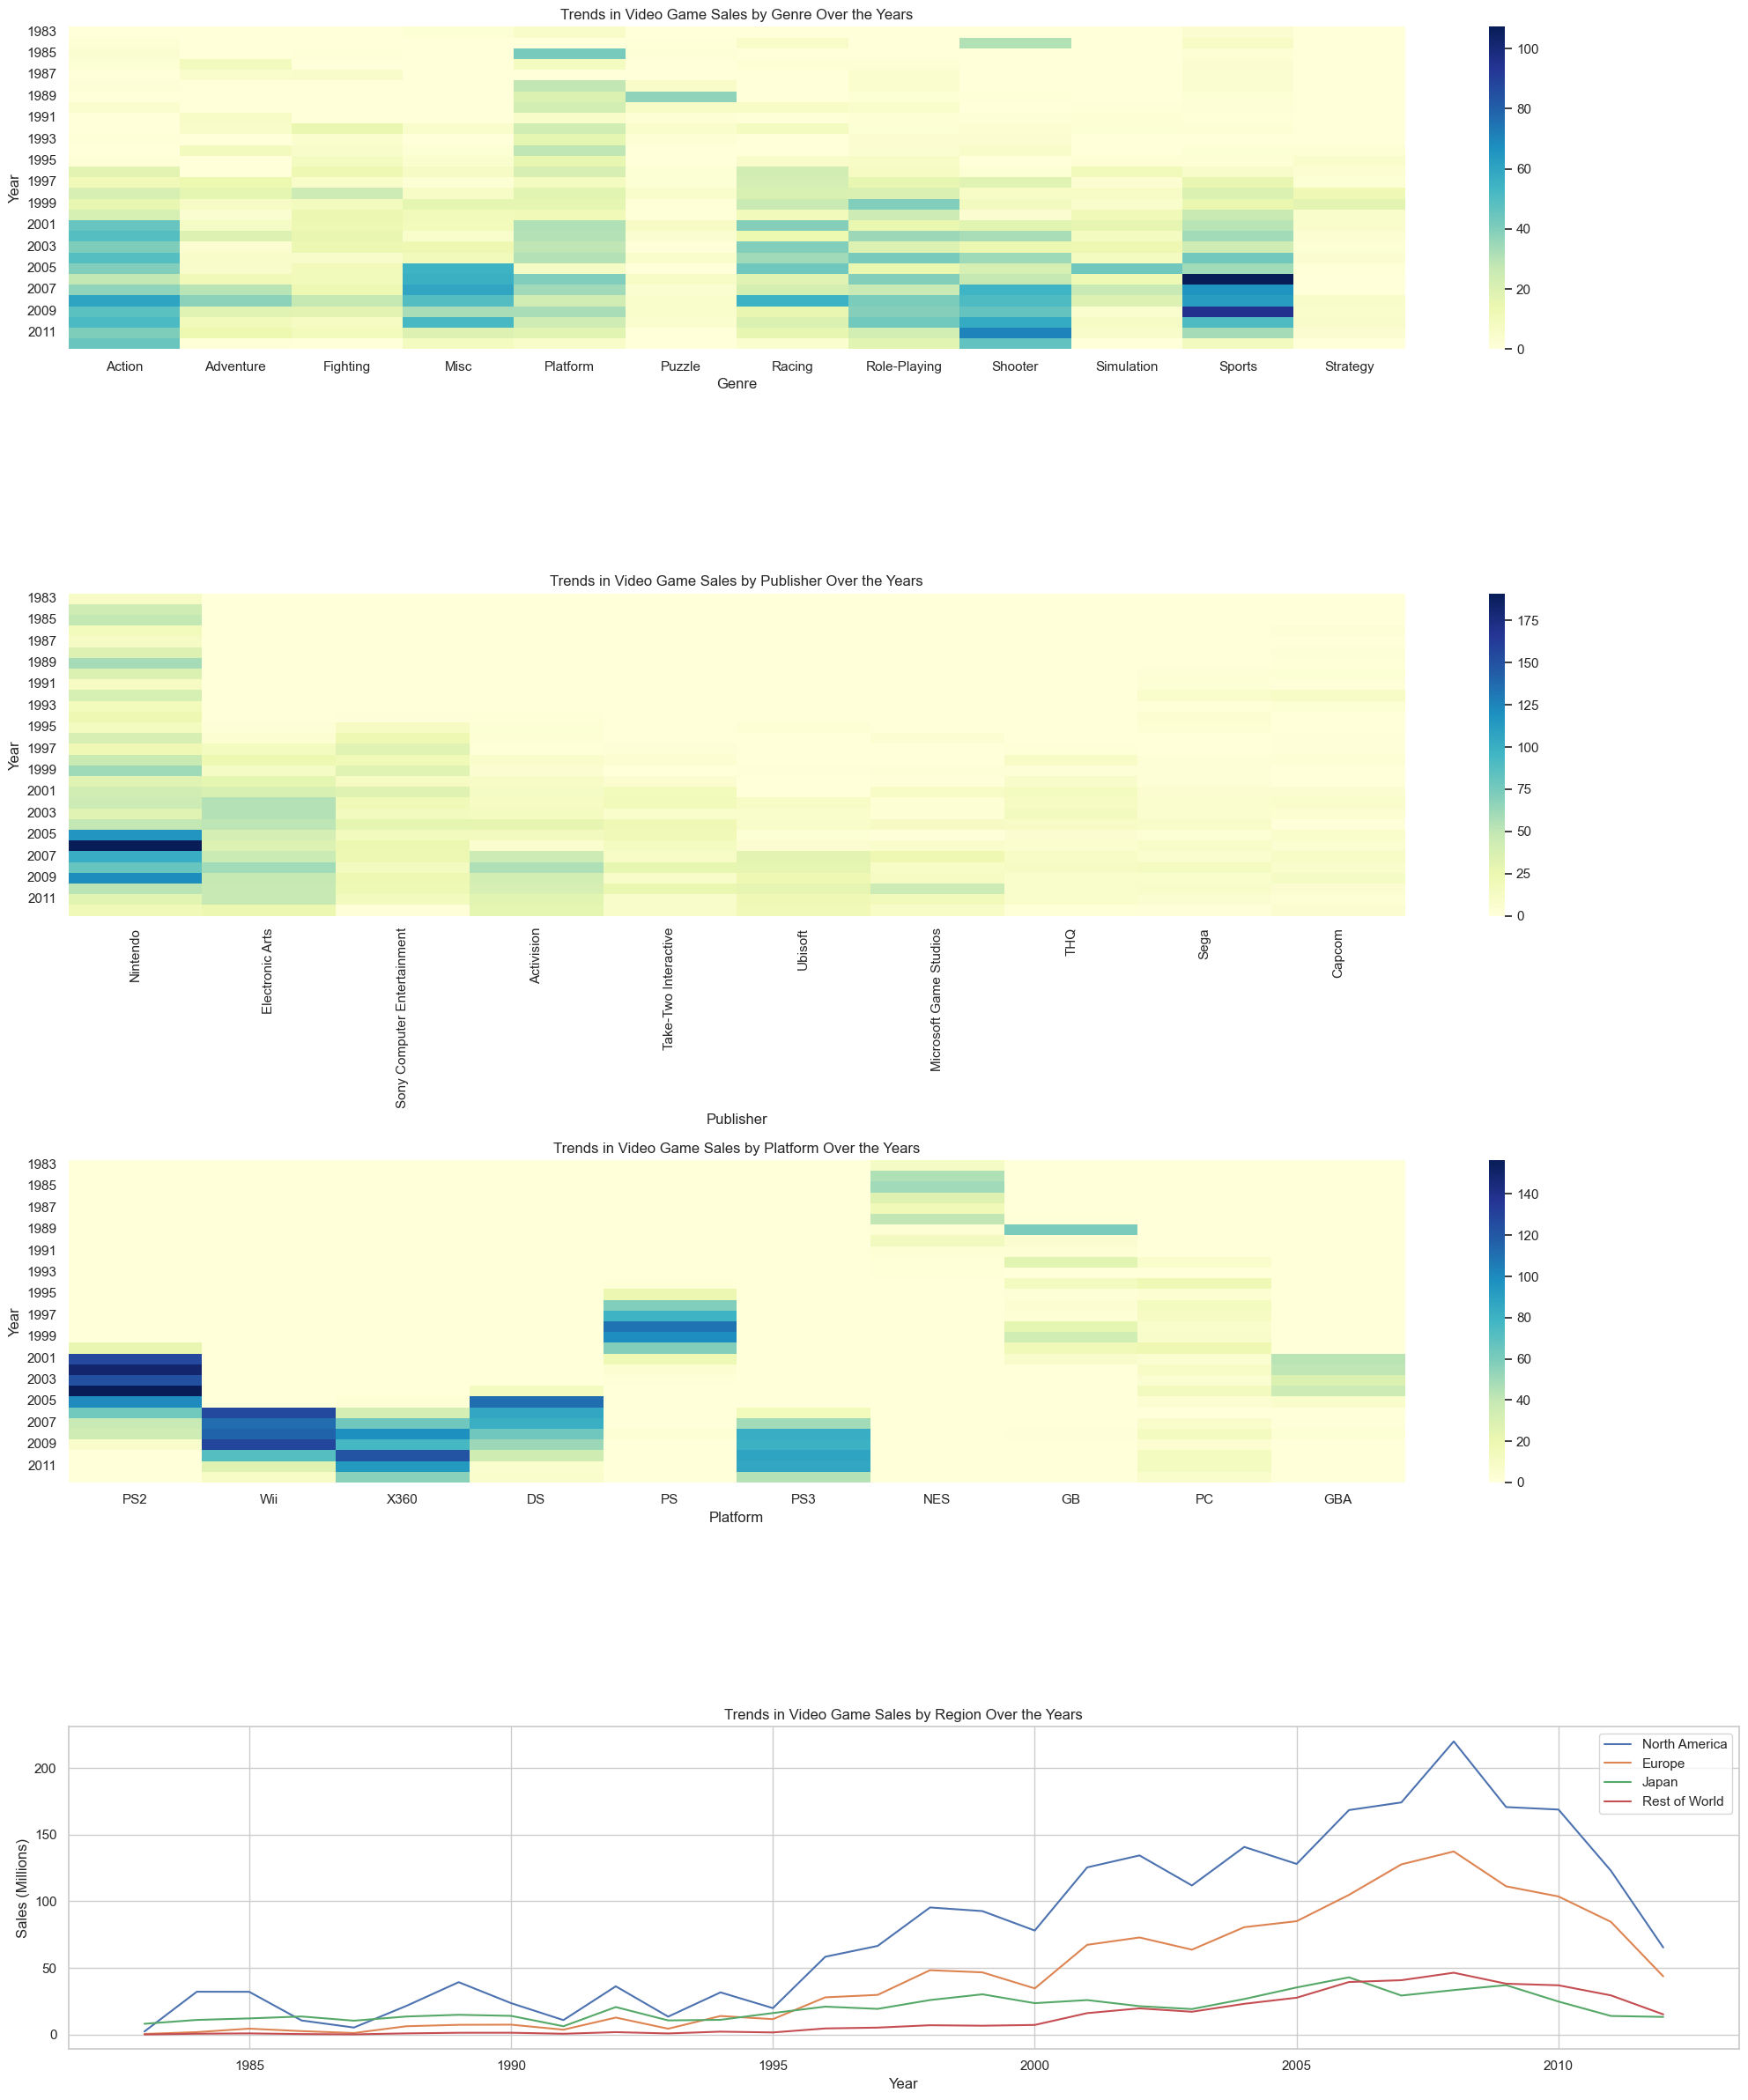

In [31]:
# Trends in sales by genre over the years
genre_trends = video_games_df.groupby(['Year', 'Genre']).sum(numeric_only=True)['Global'].unstack().fillna(0)
publisher_trends = video_games_df.groupby(['Year', 'Publisher']).sum(numeric_only=True)['Global'].unstack().fillna(0)
platform_trends = video_games_df.groupby(['Year', 'Platform']).sum(numeric_only=True)['Global'].unstack().fillna(0)
regional_trends = video_games_df.groupby('Year').sum(numeric_only=True)[['North America', 'Europe', 'Japan', 'Rest of World']]

# Visualizing the trends
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 24))

# Genre Trends
sns.heatmap(genre_trends, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Trends in Video Game Sales by Genre Over the Years')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Year')

# Publisher Trends (Top 10 Publishers for visibility)
top_publishers = publisher_trends.sum().sort_values(ascending=False).head(10).index
sns.heatmap(publisher_trends[top_publishers], cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Trends in Video Game Sales by Publisher Over the Years')
axes[1].set_xlabel('Publisher')
axes[1].set_ylabel('Year')

# Platform Trends (Top 10 Platforms for visibility)
top_platforms = platform_trends.sum().sort_values(ascending=False).head(10).index
sns.heatmap(platform_trends[top_platforms], cmap="YlGnBu", ax=axes[2])
axes[2].set_title('Trends in Video Game Sales by Platform Over the Years')
axes[2].set_xlabel('Platform')
axes[2].set_ylabel('Year')

# Regional Trends
regional_trends.plot(ax=axes[3])
axes[3].set_title('Trends in Video Game Sales by Region Over the Years')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Sales (Millions)')

plt.tight_layout()
plt.show()

### Linear Regression

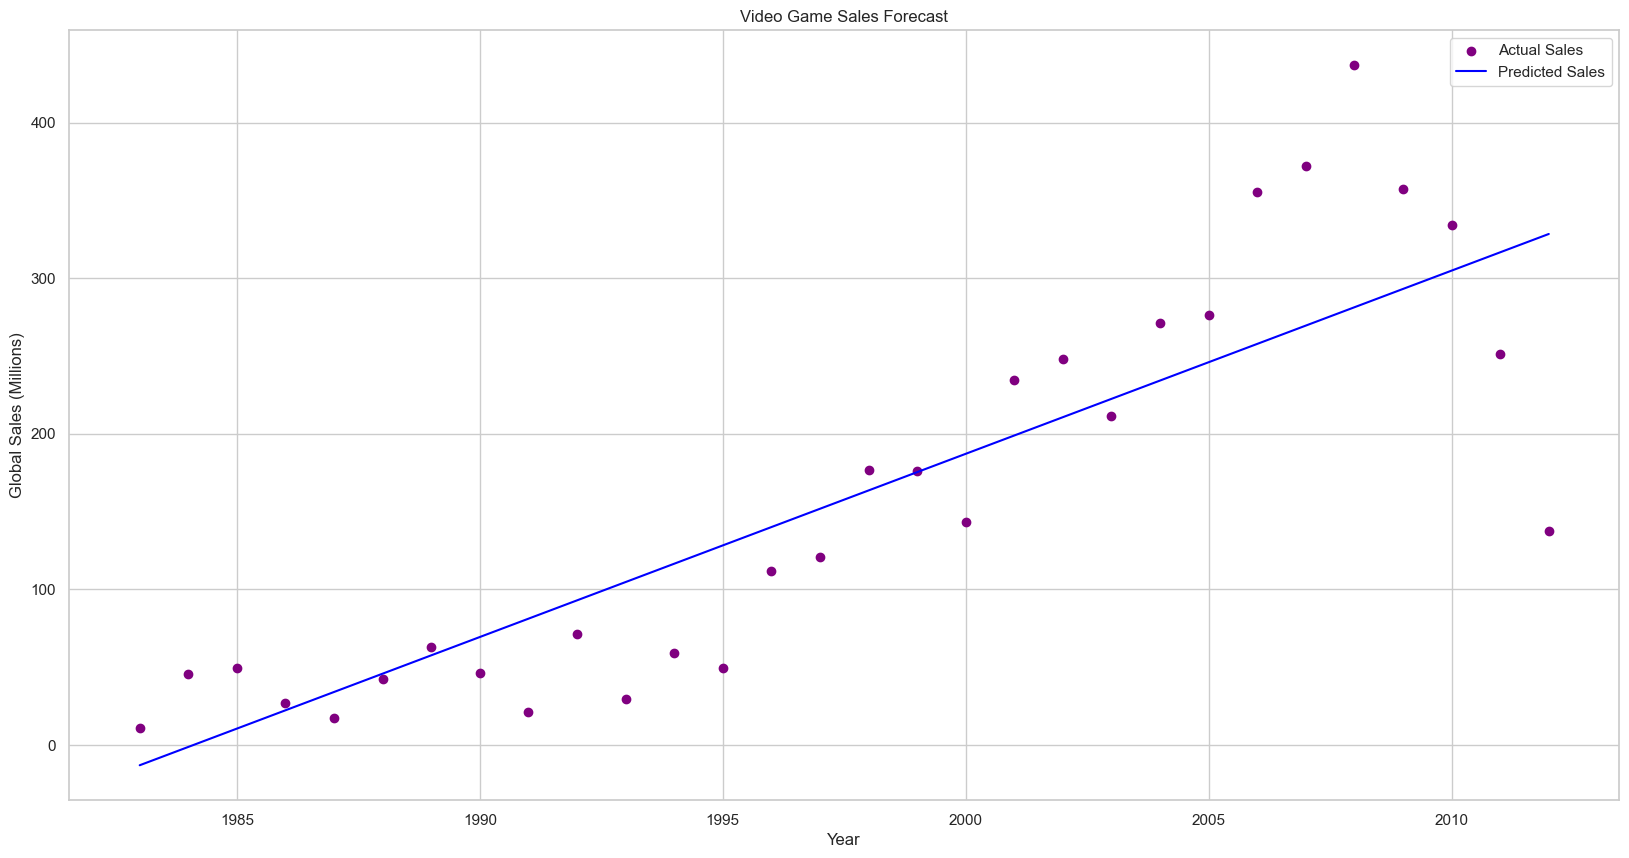

(0.8217631146192889, array([[11.77422958]]))

In [34]:
# Aggregate global sales data by year
annual_sales = video_games_df.groupby('Year')['Global'].sum().reset_index()

# Prepare data for linear regression
X = annual_sales['Year'].values.reshape(-1, 1)  # Features (Year)
y = annual_sales['Global'].values.reshape(-1, 1)  # Target (Global Sales)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Visualizing the model fit
plt.figure(figsize=(20, 10))
plt.scatter(X, y, color='purple', label='Actual Sales')
plt.plot(X, model.predict(X), color='blue', label='Predicted Sales')
plt.title('Video Game Sales Forecast')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.legend()
plt.show()

# Coefficients and model score
model_score = model.score(X_test, y_test)
model_coefficients = model.coef_

model_score, model_coefficients

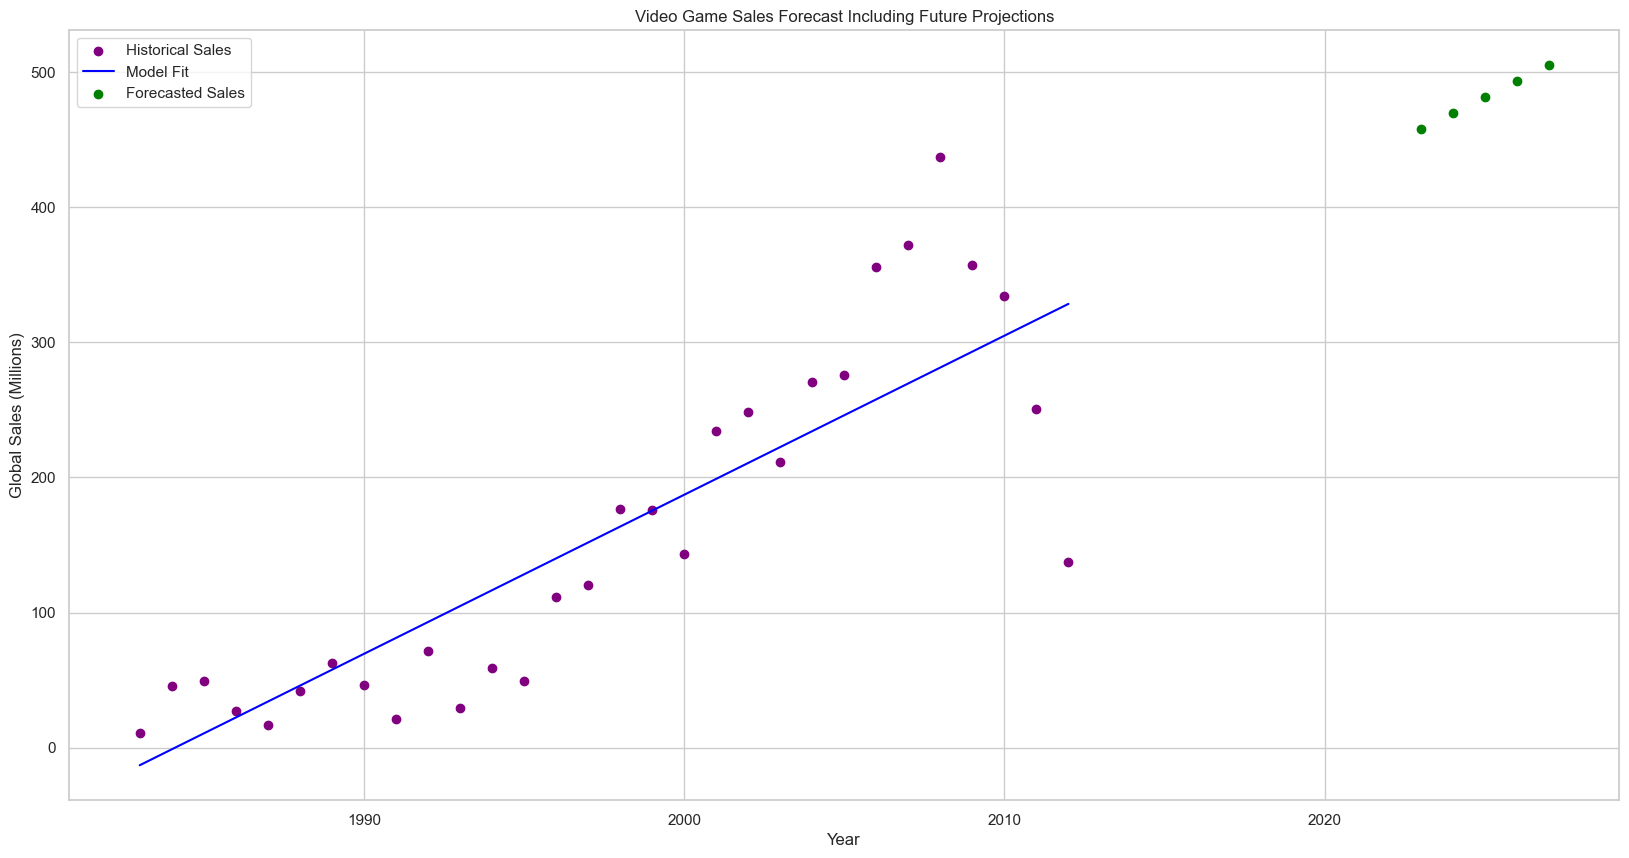

,Year,Predicted Global Sales
0,2023,457.975802
1,2024,469.750032
2,2025,481.524261
3,2026,493.298491
4,2027,505.072721


In [37]:
# Forecast for the next 5 years
future_years = np.array([[year] for year in range(2023, 2028)])  # 2023 to 2027
future_sales = model.predict(future_years)

# Creating a DataFrame for visualization
future_sales_df = pd.DataFrame(future_years, columns=['Year'])
future_sales_df['Predicted Global Sales'] = future_sales.flatten()

# Adding to existing plot for complete visualization
plt.figure(figsize=(20, 10))
plt.scatter(X, y, color='purple', label='Historical Sales')
plt.plot(X, model.predict(X), color='blue', label='Model Fit')
plt.scatter(future_years, future_sales, color='green', label='Forecasted Sales')
plt.title('Video Game Sales Forecast Including Future Projections')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.legend()
plt.show()

future_sales_df

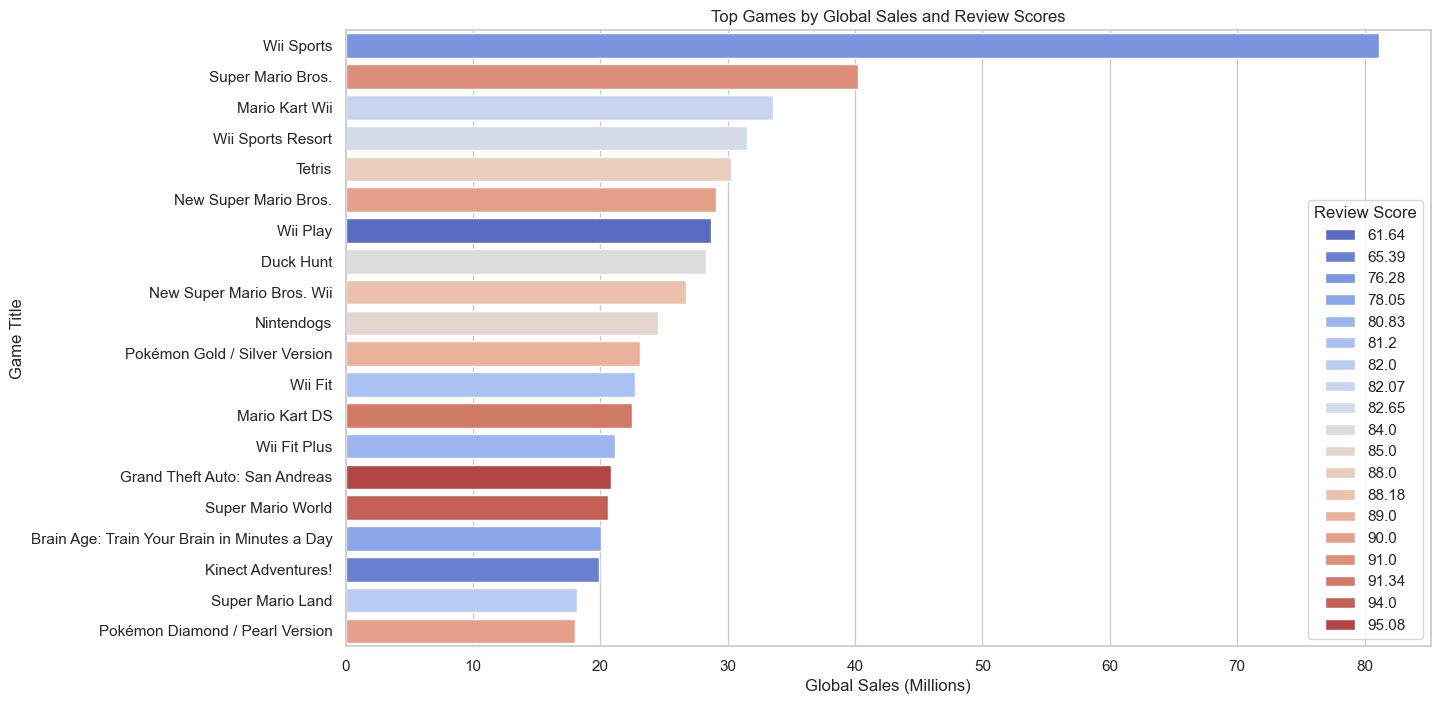

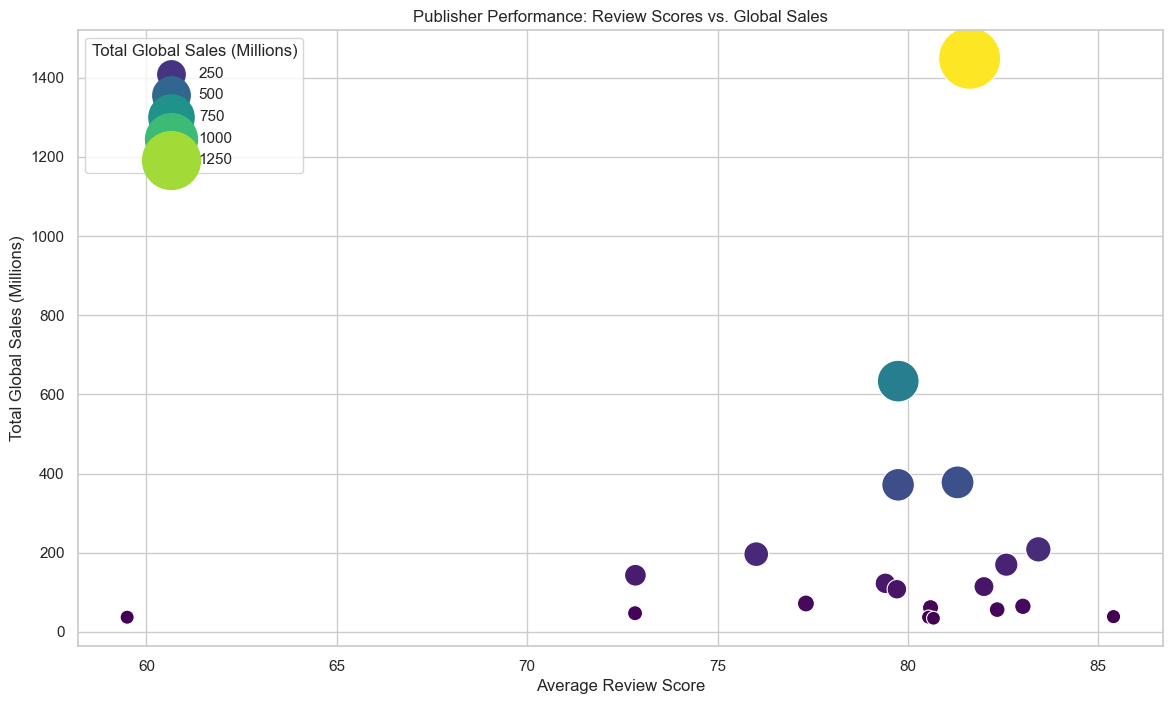

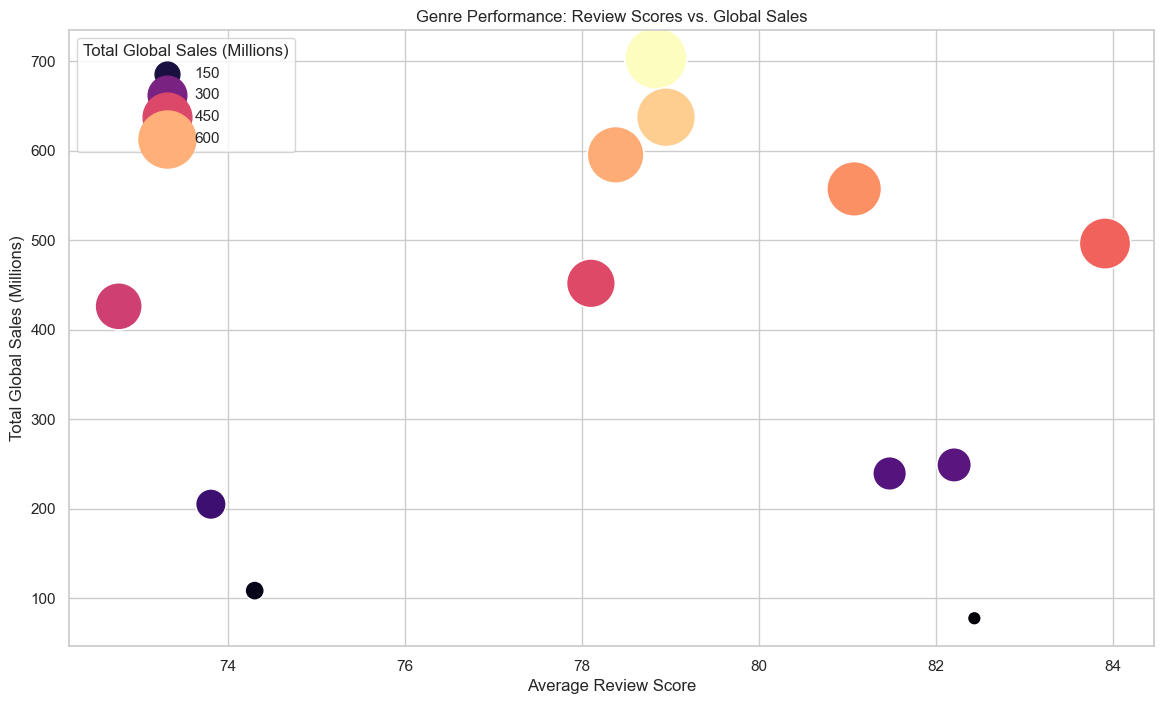

In [47]:
# Identifying the top games by global sales and their review scores
top_games_by_sales = video_games_df.sort_values(by='Global', ascending=False).head(20)

# Comparative analysis by publisher: Average review scores and total global sales per publisher
publisher_performance = video_games_df.groupby('Publisher').agg(
    Average_Review=('Review', 'mean'),
    Total_Global_Sales=('Global', 'sum')
).sort_values(by='Total_Global_Sales', ascending=False).head(20)

# Genre-based analysis: Average review scores and total global sales per genre
genre_performance = video_games_df.groupby('Genre').agg(
    Average_Review=('Review', 'mean'),
    Total_Global_Sales=('Global', 'sum')
).sort_values(by='Total_Global_Sales', ascending=False)

# Visualizing the top games by sales and review scores
plt.figure(figsize=(14, 8))
sns.barplot(x='Global', y='Game Title', data=top_games_by_sales, hue='Review', dodge=False, palette='coolwarm')
plt.title('Top Games by Global Sales and Review Scores')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game Title')
plt.legend(title='Review Score')
plt.show()

# Visualizing publisher performance
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x='Average_Review', y='Total_Global_Sales', 
                     data=publisher_performance, size='Total_Global_Sales', 
                     sizes=(100, 2000), hue='Total_Global_Sales', palette='viridis')
plt.title('Publisher Performance: Review Scores vs. Global Sales')
plt.xlabel('Average Review Score')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(True)
plt.legend(title='Total Global Sales (Millions)', loc='upper left')
plt.show()

# Visualizing genre performance
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x='Average_Review', y='Total_Global_Sales', data=genre_performance, size='Total_Global_Sales', sizes=(100, 2000), hue='Total_Global_Sales', palette='magma')
plt.title('Genre Performance: Review Scores vs. Global Sales')
plt.xlabel('Average Review Score')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(True)
plt.legend(title='Total Global Sales (Millions)', loc='upper left')
plt.show()

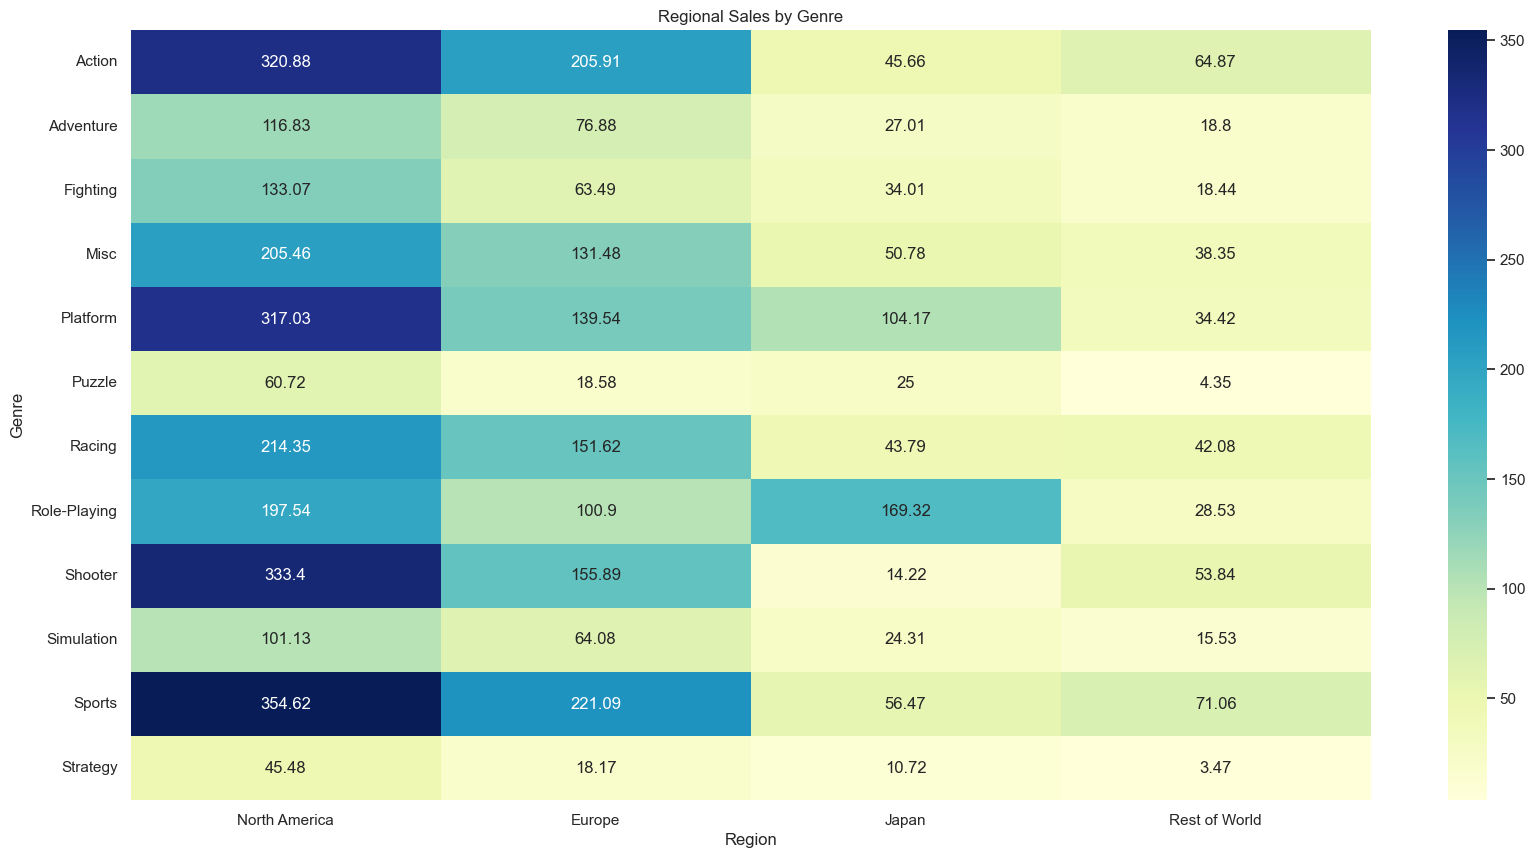

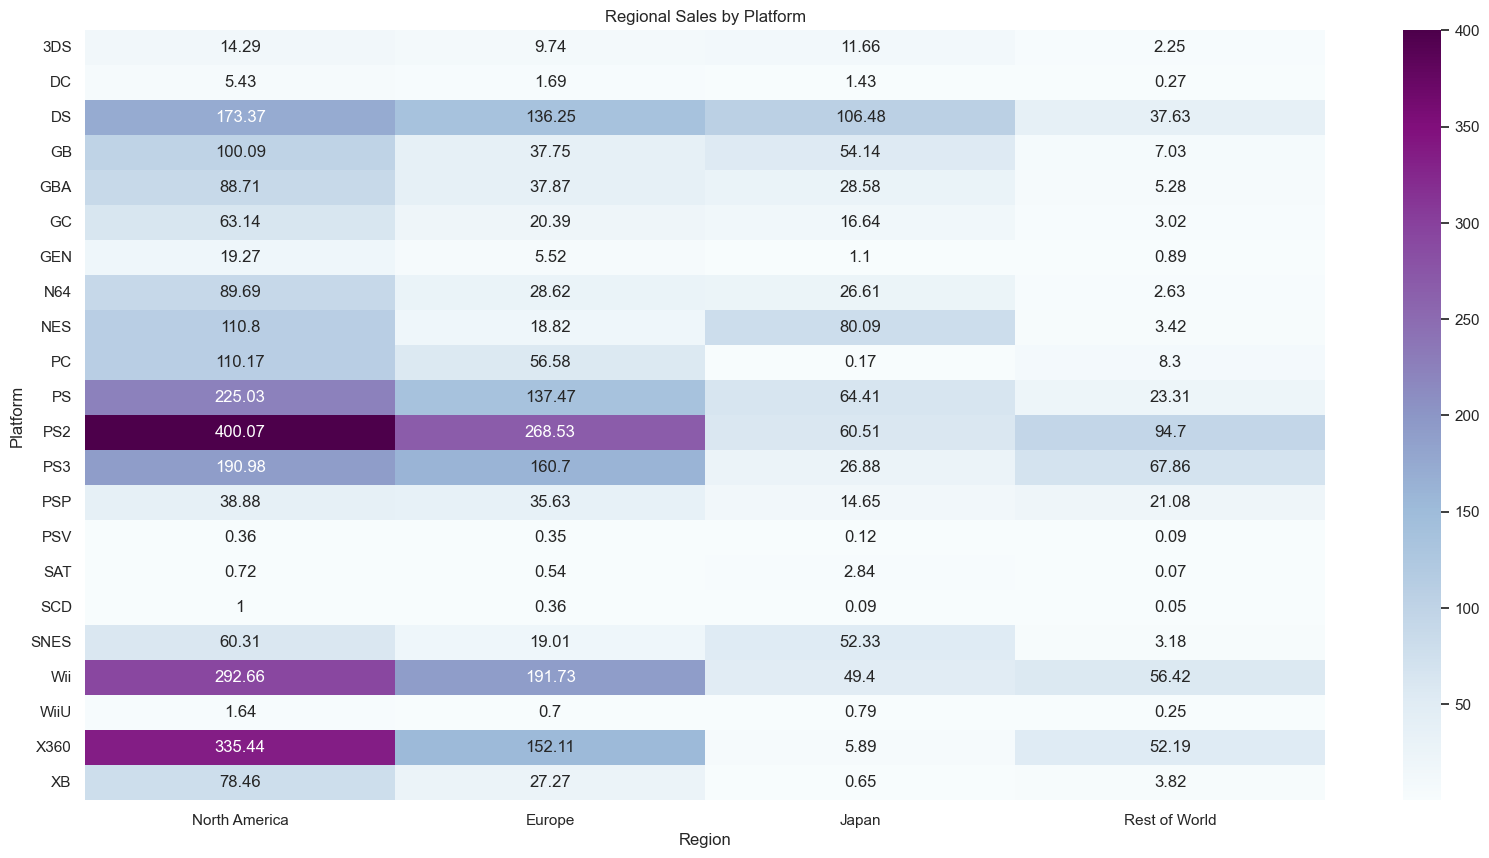

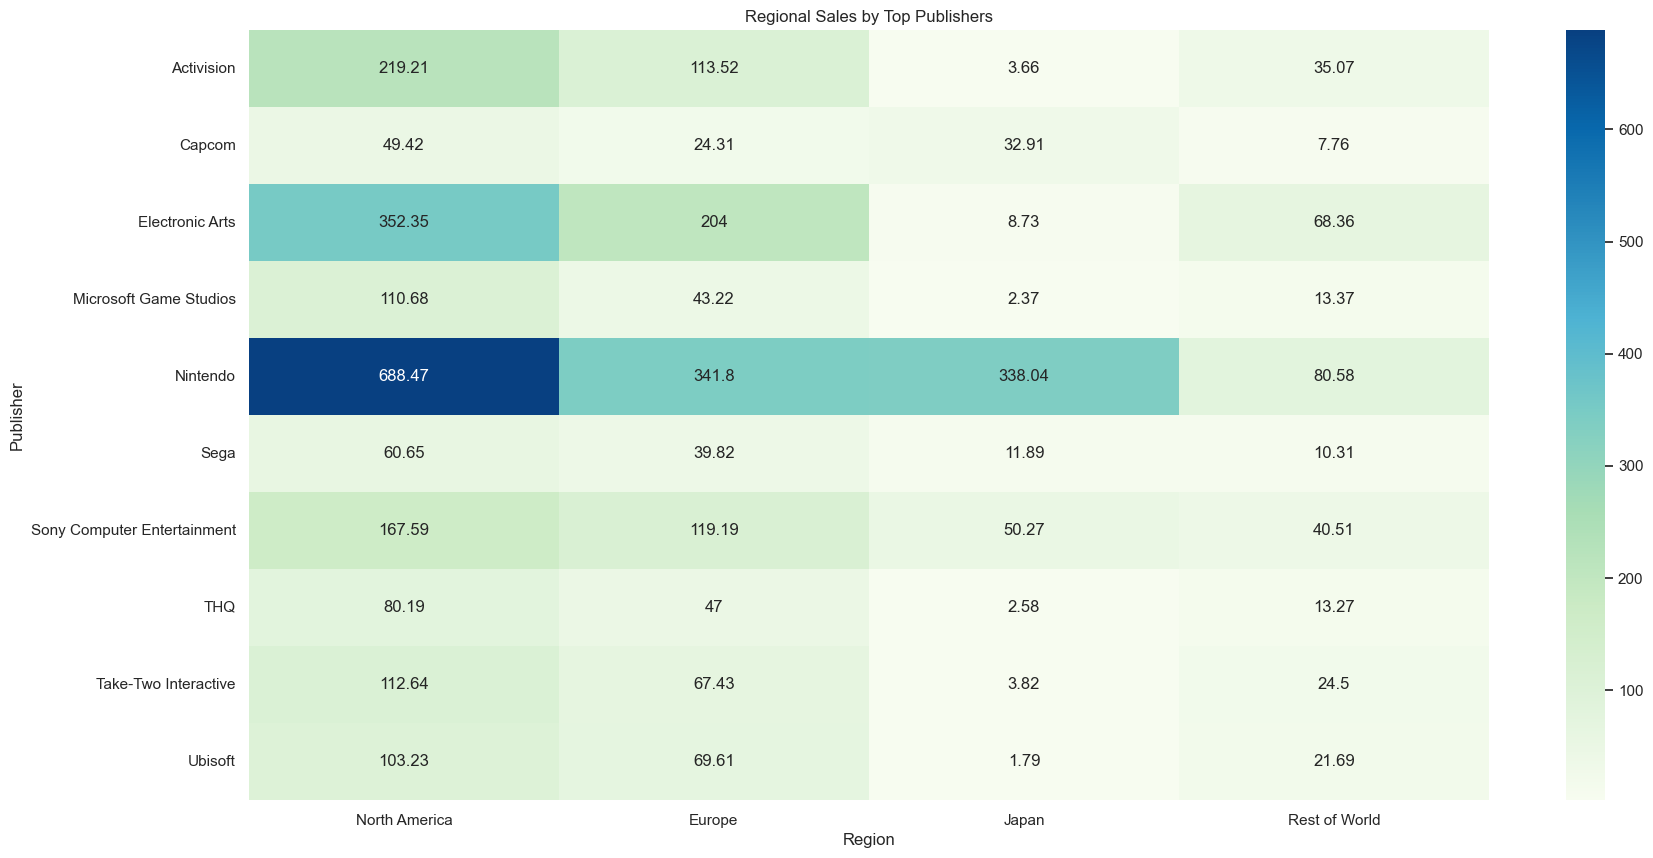

In [45]:
# Correcting the data preparation step
# Summing up the sales data correctly without sorting by an undefined 'Global' column
regional_genre_sales = video_games_df.groupby('Genre').sum(numeric_only=True)[['North America', 'Europe', 'Japan', 'Rest of World']]
regional_platform_sales = video_games_df.groupby('Platform').sum(numeric_only=True)[['North America', 'Europe', 'Japan', 'Rest of World']]
regional_publisher_sales = video_games_df[video_games_df['Publisher'].isin(top_publishers)].groupby('Publisher').sum(numeric_only=True)[['North America', 'Europe', 'Japan', 'Rest of World']]

# Visualizing Regional Sales by Genre
plt.figure(figsize=(20, 10))
sns.heatmap(regional_genre_sales, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Regional Sales by Genre')
plt.ylabel('Genre')
plt.xlabel('Region')
plt.show()

# Visualizing Regional Sales by Platform
plt.figure(figsize=(20,10))
sns.heatmap(regional_platform_sales, annot=True, cmap="BuPu", fmt='g')
plt.title('Regional Sales by Platform')
plt.ylabel('Platform')
plt.xlabel('Region')
plt.show()

# Visualizing Regional Sales by Top Publishers
plt.figure(figsize=(20,10))
sns.heatmap(regional_publisher_sales, annot=True, cmap="GnBu", fmt='g')
plt.title('Regional Sales by Top Publishers')
plt.ylabel('Publisher')
plt.xlabel('Region')
plt.show()

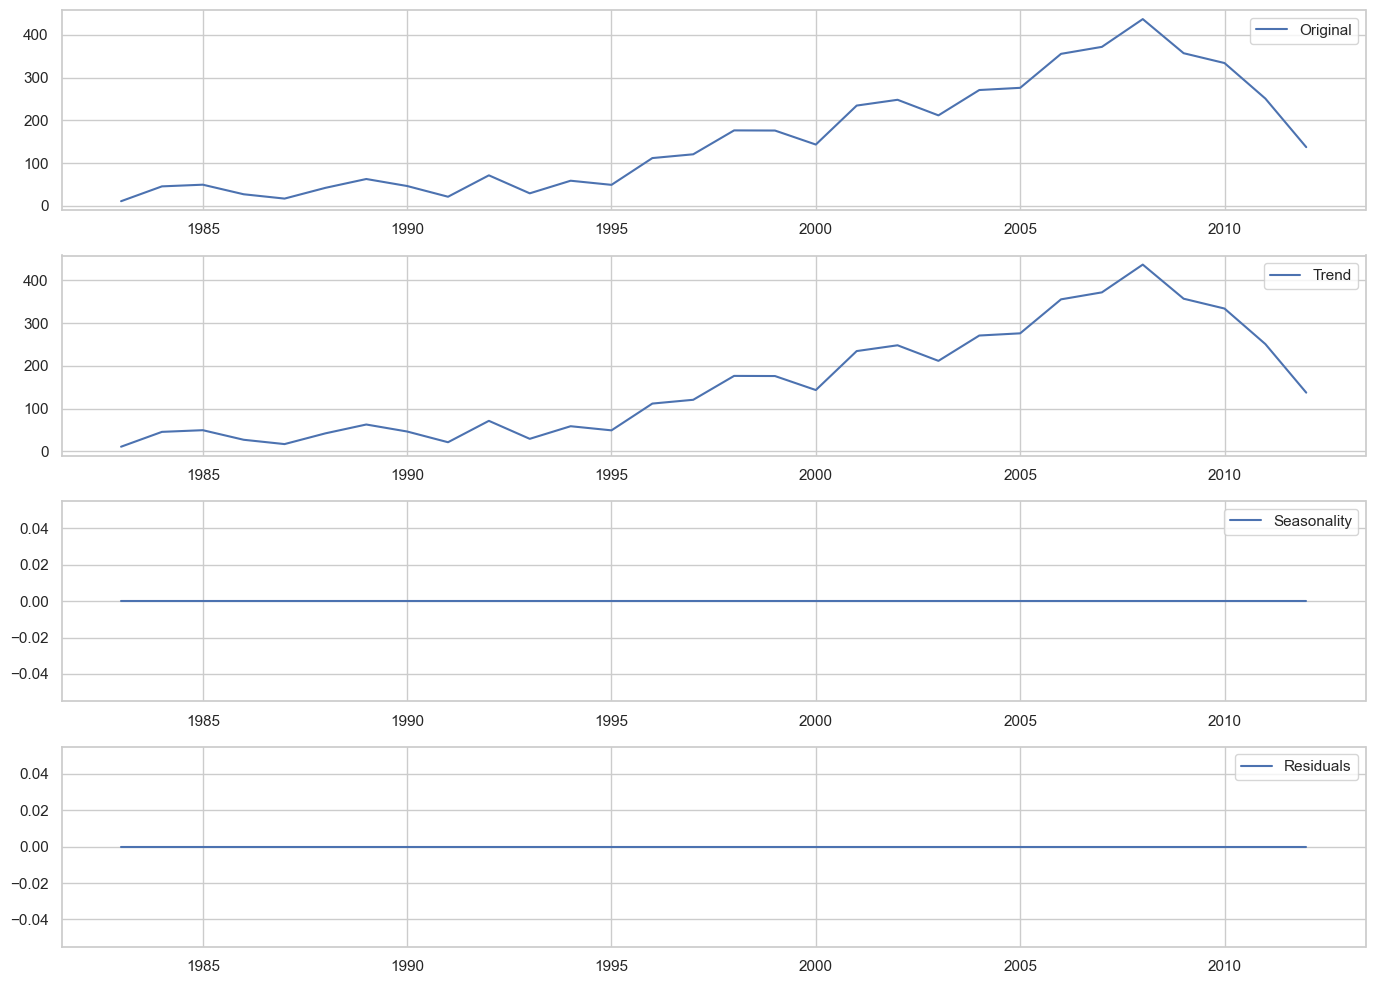

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Prepare data: Aggregate global sales by year
annual_sales_data = video_games_df.groupby('Year')['Global'].sum()

# Ensuring the time series is complete by filling any missing years
all_years = range(annual_sales_data.index.min(), annual_sales_data.index.max() + 1)
annual_sales_data = annual_sales_data.reindex(all_years, fill_value=0)

# Performing a seasonal decomposition of the time series data
decomposition = seasonal_decompose(annual_sales_data, model='additive', period=1)  # Assuming no clear seasonality period without more info

# Plotting the decomposition
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(annual_sales_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Data preparation with OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(video_games_df[['Genre', 'Publisher']])

# Combine the encoded features with the 'Global' sales for clustering
clustering_features = np.hstack((encoded_features, video_games_df[['Global']].values))

# Initializing and fitting the K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(clustering_features)

# Assigning cluster labels to the original data
video_games_df['Cluster'] = kmeans_clusters

# Displaying a sample of the clustered data and some insights
clustered_sample = video_games_df[['Game Title', 'Genre', 'Publisher', 'Global', 'Cluster']].sample(10)

# Analyzing clusters by calculating mean sales per cluster
cluster_means = video_games_df.groupby('Cluster')['Global'].mean()

clustered_sample, cluster_means

c:\Users\Than Aung Kyaw\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Than Aung Kyaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Data preparation with OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(video_games_df[['Genre', 'Publisher']])

# Combine the encoded features with the 'Global' sales for clustering
clustering_features = np.hstack((encoded_features, video_games_df[['Global']].values))

# Initializing and fitting the K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(clustering_features)

# Assigning cluster labels to the original data
video_games_df['Cluster'] = kmeans_clusters

# Displaying a sample of the clustered data and some insights
clustered_sample = video_games_df[['Game Title', 'Genre', 'Publisher', 'Global', 'Cluster']].sample(10)

# Analyzing clusters by calculating mean sales per cluster
cluster_means = video_games_df.groupby('Cluster')['Global'].mean()

clustered_sample, cluster_means

c:\Users\Than Aung Kyaw\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Than Aung Kyaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'